In [14]:
import copy
import numpy as np
import pandas as pd
# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
#datacleaning()

# 读取数据
a=np.loadtxt('train_input.csv',dtype=np.float64)
b=np.loadtxt('output.txt',dtype=np.float64)
b = b[:,np.newaxis]
#按行拼接，训练集输出也是信息
values=np.concatenate((a,b),axis=1)
#深复制而非浅复制，很有意思的
data = copy.deepcopy(values)
data = pd.DataFrame(data)
def series_to_supervised(data, n_in, n_out):
    df = pd.DataFrame(data)
    n_vars = df.shape[1]  # n_vars 列数
    cols, names = list(), list()
    
    # 时间间隔跨度, 时间点个数，共 n_in 个
    # 首先添加当前时刻之前的时间点
    for i in range(n_in - 1, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # 然后添加当前时刻
    cols.append(df)
    names += [('var%d(t)' % (j + 1)) for j in range(n_vars)]

    # 添加 target 为未来 n_out 分钟后时刻的温度
    cols.append(df.shift(-n_out))
    names += [('var%d(t+%d)' % (j + 1, n_out)) for j in range(n_vars)]

    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # 删除缺失值
    agg.dropna(inplace=True)
    return agg
# 确保所有数据是 float64 类型
data = data.astype('float64')
data

,0,1,2,3,4,5,6,7
0,0.268900,0.650894,0.832742,0.583420,0.784759,0.843079,0.822079,0.180295
1,0.268483,0.650140,0.852153,0.577510,0.776487,0.838605,0.822079,0.177124
2,0.267967,0.659657,0.823618,0.571600,0.764546,0.807879,0.786246,0.173618
3,0.267451,0.668338,0.808371,0.565689,0.752605,0.799606,0.786246,0.171640
4,0.266935,0.647191,0.761948,0.559779,0.745326,0.773122,0.746142,0.166972
5,0.266419,0.633665,0.774621,0.555084,0.756059,0.811341,0.786373,0.163679
6,0.265904,0.654012,0.774420,0.551762,0.766794,0.851661,0.820795,0.160249
7,0.265388,0.672287,0.773997,0.548440,0.761244,0.805605,0.822079,0.158242
8,0.263477,0.639337,0.762100,0.545118,0.753249,0.811175,0.789002,0.157044
9,0.252709,0.662216,0.770372,0.541796,0.745255,0.813164,0.789002,0.154792


In [15]:
# 构建成监督学习数据集
# 比如根据当前时刻及之前100时刻的数据预测下一个时刻
# 这实际上是在获取 t - n_in + 1 时刻到 t 时刻共 n_in 个特征和第 t + n_out 时刻目标值
number1=100
number2=1

In [16]:
reframed = series_to_supervised(data, number1, number2)
reframed.head()
print(reframed.shape)
# reframed

(1496, 808)


In [17]:
#丢弃我们不想预测的列,这里预测的是最后一列，丢弃其他列
drop_col = [number1*8, number1*8+1, number1*8+2, number1*8+3, number1*8+4, number1*8+5, number1*8+6]
reframed.drop(reframed.columns[drop_col], axis=1, inplace=True)
# reframed.head()

In [18]:
# 把数据分为训练集和测试集
values = reframed.values
print(values.shape)

(1496, 801)


In [19]:
train = values[:int(values.shape[0]*0.8), :]
test = values[int(values.shape[0]*0.8):, :]

# 把数据分为输入和输出
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# 把输入重塑成符合LSTM输入的3D格式 [样例， 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], number1, 8))
test_X = test_X.reshape((test_X.shape[0], number1, 8))

print("训练集数据 shape:", train_X.shape)
print("训练集标签 shape:", train_y.shape)
print("测试集数据 shape:", test_X.shape)
print("测试集标签 shape:", test_y.shape)

训练集数据 shape: (1196, 100, 8)
训练集标签 shape: (1196,)
测试集数据 shape: (300, 100, 8)
测试集标签 shape: (300,)


In [20]:
epochs=30
batch_size = 32
learning_rate = 0.001
patience=3

Epoch 1/30
38/38 [==============================] - 2s 24ms/step - loss: 0.5559 - accuracy: 8.3612e-04 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 2/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0788 - accuracy: 8.3612e-04 - val_loss: 0.0022 - val_accuracy: 0.0000e+00
Epoch 3/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0232 - accuracy: 0.0017 - val_loss: 0.0034 - val_accuracy: 0.0000e+00
Epoch 4/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0138 - accuracy: 0.0017 - val_loss: 0.0018 - val_accuracy: 0.0000e+00
Epoch 5/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0101 - accuracy: 8.3612e-04 - val_loss: 0.0037 - val_accuracy: 0.0000e+00
Epoch 6/30
38/38 [==============================] - 1s 20ms/step - loss: 0.0086 - accuracy: 0.0017 - val_loss: 0.0017 - val_accuracy: 0.0000e+00
Epoch 7/30
38/38 [==============================] - 1s 22ms/step - loss: 0.0078 - accuracy: 8.3612e-04 - val_loss: 0.0

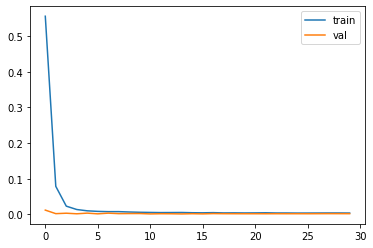

In [21]:
import math
from keras.losses import mean_squared_error
from keras.callbacks import ReduceLROnPlateau
from keras.optimizer_v2.adam import Adam
from matplotlib import pyplot as plt
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from keras.layers import Dropout
# 搭建RNN网络模型，默认activation="tanh"
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.5))
model.add(SimpleRNN(units=64, return_sequences=False))
model.add(Dropout(0.5))

model.add(Dense(32))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=learning_rate),metrics=['accuracy'])

lrate = ReduceLROnPlateau(monitor= 'val_loss',min_lr=0.00001,patience=patience,factor=0.5)
# 拟合网络，batch_size默认32
history = model.fit(train_X,
                    train_y,
                    epochs = epochs,
                    batch_size=batch_size,
                    validation_data=(test_X, test_y),
                    callbacks=lrate,
                    verbose=1,
                    shuffle=True)
# 保存模型
model.save('results/SRNN.h5')
# 绘制历史数据
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

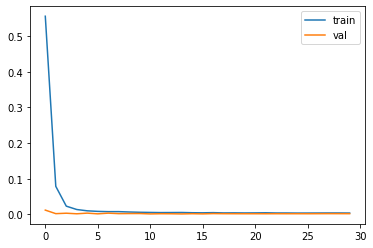

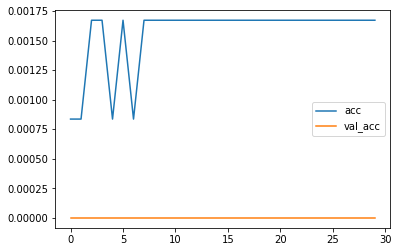

[0.0021212093997746706, 0.0]


In [22]:
# 绘制历史数据
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# 模型评估
score = model.evaluate(test_X, test_y, verbose=0)
print(score)
# 观察结果

In [23]:
from tensorflow.keras.models import load_model
# 加载模型调入测试集尝试一下
model_path = 'results/SRNN.h5'
model = load_model(model_path)

predicted_data = model.predict(test_X)
print(test_y.shape)
print(predicted_data.shape)

(300,)
(300, 1)


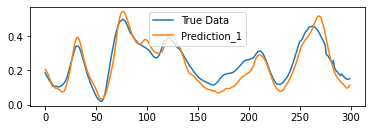

In [24]:
fig = plt.figure(facecolor='white')
ax = fig.add_subplot(211)
ax.plot(test_y, label='True Data')
ax.plot(predicted_data, label='Prediction_1')
ax.legend()
plt.show()

In [25]:
pre_1_dim = predicted_data[:,0]

In [26]:
rmse = math.sqrt(mean_squared_error(test_y,pre_1_dim))
print("模型的RMSE:{}".format(round(rmse,3)))

模型的RMSE:0.046


In [28]:
# 读取数据输出结果
def predict(sequence):
    # 数据处理
    sequence = sequence.astype('float64')
    sequence = np.expand_dims(sequence, 0).repeat(1, axis=0)
    # print(sequence.shape)
    pre_t = model.predict(sequence)
    pre_t = np.float64(pre_t)
    return pre_t

a=np.loadtxt('train_input.csv',dtype=np.float64)
b=np.loadtxt('output.txt',dtype=np.float64)
b = b[:,np.newaxis]

c=np.loadtxt('test_input.csv',dtype=np.float64)
d=np.ones([798,1], dtype = np.float64)

values=np.concatenate((a,b),axis=1)
values2=np.concatenate((c,d),axis=1)
values = values[-number1:,:]
print(values.shape)
print(values2.shape)

(100, 8)
(798, 8)


In [ ]:
for i in range(798):
    # print(predict(values))
    pre=predict(values)
    d[i] = pre
    # print(d[i])
    values = np.delete(values, 0, axis = 0)
    values2[i,7]=d[i]
    e = values2[i]
    e = e[np.newaxis,:]
    #print(e.shape)
    values=np.concatenate((values,e),axis=0)
    #print(values.shape)
data = pd.DataFrame(values2)
writer = pd.ExcelWriter('results/TESTRNN.xlsx')
data.to_excel(writer, 'page_1', float_format='%.32f')		# ‘page_1’是写入excel的sheet名
writer.save()
writer.close()